loss at step 0 of 10000 = 1.10586


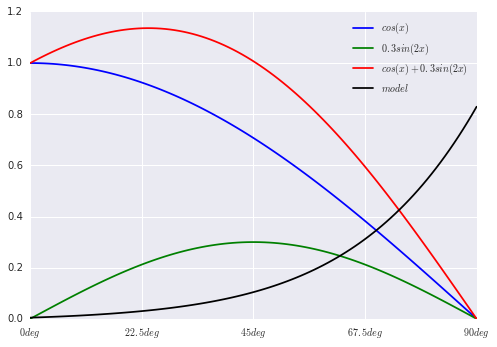

loss at step 2000 of 10000 = 0.693909


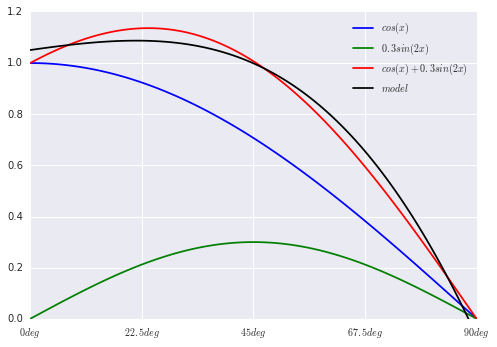

loss at step 4000 of 10000 = 0.693519


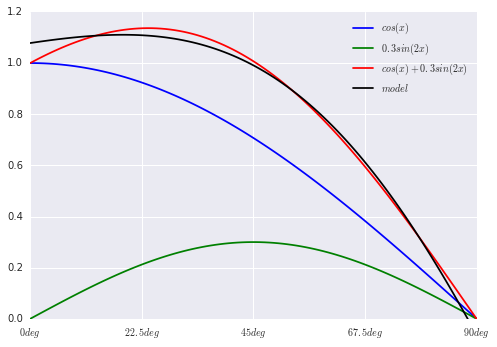

loss at step 6000 of 10000 = 0.693416


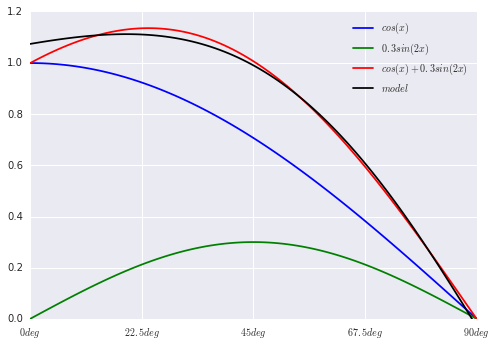

loss at step 8000 of 10000 = 0.693364


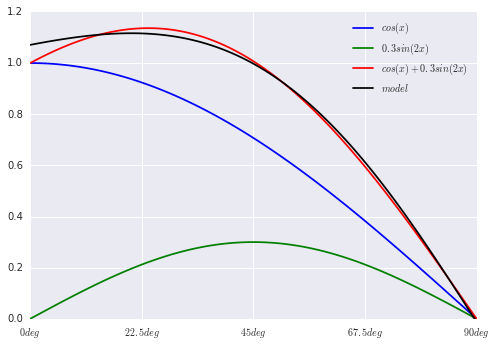

finish!  w = [ 0.23201412 -0.13302238 -0.25797993 -0.19918044  0.11768229] , b = [ 1.06491196]


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# parameter
n = 100
order = 5
learn_step = 0.01
epochs = 10000
sample = 2000
batch_size = 15

# training data
tr_x = tf.linspace(0.0, np.pi / 2, n)
tr_y1 = tf.cos(tr_x)
tr_y2 = 0.3 * tf.sin(2 * tr_x)
tr_y = tr_y1 + tr_y2

# variables to optimize
w = tf.Variable(tf.random_uniform([order], 0, 0.05))
b = tf.Variable(tf.zeros([1]))

# loss function
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

def polynom(x, order, w, b):
    y = tf.zeros([n])
    for i in range(order):
        y = y + (w[i] * (tf.pow(x, i + 1)))
    y = y + b
    return y

y_model = polynom(x, order, w, b)

square_sum = tf.reduce_sum(tf.square(y - y_model))/n
loss = tf.nn.sigmoid_cross_entropy_with_logits(square_sum, 0.0)
train_op = tf.train.GradientDescentOptimizer(learn_step).minimize(loss)
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    x_value, y1_value, y2_value, y_value = sess.run([tr_x, tr_y1, tr_y2, tr_y])
    for i in range(epochs):
        indices = np.random.choice(list(range(len(x_value))))
        x_batch = x_value[indices]
        y_batch = y_value[indices]
        sess.run(train_op, feed_dict = {x: x_batch, y: y_batch})
        if i % sample == 0:
            y_model_value, loss_value = sess.run([y_model, loss], feed_dict = {x: x_value, y: y_value})
            print('loss at step', i, 'of', epochs, '=', loss_value)
            plt.plot(x_value, y1_value, label = '$cos(x)$',color = 'b')
            plt.plot(x_value, y2_value, label = '$0.3sin(2x)$',color = 'g')
            plt.plot(x_value, y_value, label = '$cos(x)+0.3sin(2x)$',color = 'r')
            plt.plot(x_value, y_model_value, label = '$model$',color = 'k')
            plt.xlim(0, np.pi / 2)
            plt.ylim(0, 1.2)
            plt.xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2],
                       [r'$0deg$', r'$22.5deg$', r'$45deg$', r'$67.5deg$', r'$90deg$'])
            plt.legend()
            plt.show()
    print('finish! ','w =', sess.run(w), ', b =', sess.run(b))